### Gestão de estoques (Lote Econômico Ótimo)

Um dos problemas clássicos em Administração é o problema de se gerir um estoque.

Existem dois custos em gestão de estoques:
* O custo de se encomendar itens
* O custo de se manter itens em estoque

Pense em um estoque de um único item. A empresa encomenda sempre a mesma quantidade, $Q$.   
Encomendar tem um custo. Frete, por exemplo.

Então você poderia pensar: vou encomendar um lote grande para pagar pouco frete.
Aí você paga um dinheirão para fazer um estoque enorme.
Esse dinheiro poderia estar sendo investido, rendendo juros.
Você está abrindo mão desses juros. Isso é um custo. Um _custo de oportunidade_. A oportunidade de ganhar dinheiro que você não está ganhando.

> Estoque é dinheiro na prateleira.

Você não quer ter muito dinheiro parado, sem render juros, sem ser investido.
Então muito estoque também custa caro.

Em suma:
Pedir lotes pequenos é ruim, porque você paga muito frente.
Mas pedir lotes grandes também é ruim, porque você deixa dinheiro parado, sem render.

**Qual é o tamanho do lote que devemos pedir para ter o menor custo total?**

Vamos chamar o tamanho do lote de $Q$.
Se nossa demanda é $D$ e pedimos $Q$ a cada vez, então o número de pedidos que faremos é $D/N$.  
Se o custo de um pedido (frete, por exemplo), é $A$, entáo o custo de pedidos é

$$
A\cdot \frac{D}{Q}
$$

Note que quanto maior o lote que encomendamos, _menor_ será esse custo.

Suponha que a demanda é constante, para simplificar. Nosso estoque vai de $Q$ a zero. Em média, a quantidade que temos em estoque é $Q/2$. Se o custo de se manter um item em estoque é $H$, então o custo de manter o estoque é

$$
H\cdot\frac{Q}{2}
$$

Note que quanto maior o lote que encomendamos, _maior_ será esse custo.

O custo total é a soma dos dois custos:

$$
C(Q) = A\cdot\frac{D}{Q} + H\cdot\frac{Q}{2}
$$

Qual é o valor de $Q$ que minimiza esse custo?

Vamos pegar um caso concreto:

> A SmartTalk e uma empresa que vende smartphones. O custo de frete de $A = 100$ reais, o custo de manter uma unidade em estoque de $H = 0.10$ reais por mês e a demanda é de $D = 400$ por mês. Quantos smartphones a SmartTalk deve manter em estoque?

Começamos definindo a função que dá o custo total do estoque da empresa em função do tamanho do estoque:


In [13]:
def C(Q, D = 400, A = 100, H = 0.10):
    return((A * D/Q) +( H * Q /2))

Python nos permite calcular o mínimo dessa função em apenas 2 linhas de código:

In [18]:
from scipy.optimize import minimize
minimize(C, x0 = 100) #x0 = 100 é um chute inicial

      fun: 89.44271910041948
 hess_inv: array([[8892.20407277]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 13
     njev: 16
   status: 0
  success: True
        x: array([894.42442436])

Ou seja: a SmartTalk deve manter 894 itens em estoque. Isso lhe dá o menor custo de estoque, que será de 89.44.

Simples. Problema resolvido.

Mas como o Python sabe que a resposta é essa? Existem várias formas de se chegar nessa resposta, mas uma forma muito comum em Data Science é utilizar o método do **declive do gradiente** ([_gradient descent_](https://en.wikipedia.org/wiki/Gradient_descent)). A ideia é simples:

Eu estou em um ponto da função e quero chegar no mínimo. Preciso saber se tenho que andar para a frente ou para trás. Eu olho para a reta tangente à função nesse ponto. Se a reta for crescente, é porque a função está aumentando, logo eu preciso andar para trás. Se a reta for decrescente, é porque a função está diminuindo, logo eu preciso andar para frente.

![reta-tangente](https://study.com/cimages/multimages/16/screenshot_from_2020-04-13_14-17-441268120511678723667.jpg)

A questão é como saber se a reta tangente é crescente ou decrescente. Em Càlculo você vai aprender que basta olhar para o sinal da derivada. Se a derivada for positiva, a reta será crescente (e teremos que andar para trás). Se a derivada for negativa, a reta será decrescente (e teremos que andar para frente).

Isso significa que, a partir de cada ponto $x$, nós damos um passo igual a

$$
-\eta\frac{dy}{dx}
$$

onde $\eta$ é um número positivo chamado _velocidade de aprendizagem_ (você vai aprender mais sobre isso no seu curso de Data Science).

Se essa expressão aí em cima for positiva, daremos um passo para trás. Se for negativa, daremos um passo para frente.

Vamos implementar isso em Python:

Primeiro, uma função que cacula a derivada em um ponto:

In [3]:
def derivada(f, x, dx = 1e-4):
    dy = f(x + dx) - f(x)
    return(dy/dx)

Agora, uma função que encontra o mínimo.
A função pára quando nossos passos pararem de fazer diferença (ou seja, menor do que um valor especificado chamado de _tolerancia_).

Vamos colocar também um parâmetro chamado `mostra_trajetória` que nos permite visualizar todos os passos intermediários do algoritmo:

In [4]:
def minimo(f, x0, η = 1e-1, tol = 1e-6, n_iter_max = 1e6, mostra_trajetoria = False):
    
    from numpy import inf
    step = inf
    x = x0
    n_iter = 0
    
    while (abs(step) > tol) and (n_iter < n_iter_max):
        dydx = derivada(f, x)
        step = - η * dydx
        
        if mostra_trajetoria:
            print(f'minimo estimado: {x:.5f}. derivada: {dydx:.5f}. passo: {step:.5f}')
        
        x = x + step
        n_iter = n_iter + 1
        
        if n_iter == n_iter_max:
            print('Mínimo não alcançado')
            break
    
    return(x)

Vamos testar isso com uma função cujo mínimo nós conhecemos: $f(x) = (x-10)^2$ a partir de um chute inicial de $x = 0$. A resposta deveria ser $10$:

In [19]:
def f(x):
    return((x-10)**2)

minimo(f, x0=0)

9.999946786139981

Vamos ver o camino até se chegar nessa solulção:

In [20]:
minimo(f, x0=0, mostra_trajetoria=True)

minimo estimado: 0.00000. derivada: -19.99990. passo: 1.99999
minimo estimado: 1.99999. derivada: -15.99992. passo: 1.59999
minimo estimado: 3.59998. derivada: -12.79994. passo: 1.27999
minimo estimado: 4.87998. derivada: -10.23995. passo: 1.02399
minimo estimado: 5.90397. derivada: -8.19196. passo: 0.81920
minimo estimado: 6.72317. derivada: -6.55357. passo: 0.65536
minimo estimado: 7.37852. derivada: -5.24285. passo: 0.52429
minimo estimado: 7.90281. derivada: -4.19428. passo: 0.41943
minimo estimado: 8.32224. derivada: -3.35543. passo: 0.33554
minimo estimado: 8.65778. derivada: -2.68434. passo: 0.26843
minimo estimado: 8.92621. derivada: -2.14747. passo: 0.21475
minimo estimado: 9.14096. derivada: -1.71798. passo: 0.17180
minimo estimado: 9.31276. derivada: -1.37438. passo: 0.13744
minimo estimado: 9.45020. derivada: -1.09951. passo: 0.10995
minimo estimado: 9.56015. derivada: -0.87960. passo: 0.08796
minimo estimado: 9.64811. derivada: -0.70368. passo: 0.07037
minimo estimado: 9.7

9.999946786139981

Brilhante! Vamos agora aplicar essa função ao nosso problema da SmartTalk:

Agora, usamos função `minimo` que criamos anteriormente para descobrir qual tamanho de estoque faz esse custo ser o menor possível. Vamos usar o mesmo chute inicial que usamos anteriormente: 100.

In [21]:
minimo(C, 100)

894.3377135991909

A SmartTalk deve manter aproximadamente 894 unidades em estoque.  Isso lhe dá um custo de:

In [22]:
C(894)

89.4427293064877

Se você quiser ver isso em um gráfico, rode o código abaixo.  
Ele vai fazer um gráfico com a função $f(x)$ e marcar o ponto onde ele calculou que é o custo mínimo. 
Veja se, de fato, ele parece ser o custo mínimo.

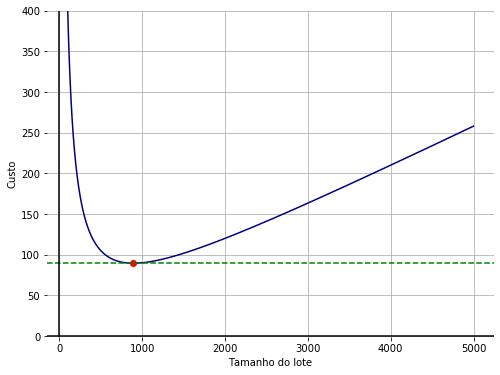

In [23]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(100, 5000)
y = C(x)
plt.figure(figsize=(8,6))
plt.plot(x, y, c = 'navy')
plt.ylim(-1,400)
plt.grid('on')

Q_menor_custo = minimo(C, 100)
menor_custo = C(Q_menor_custo)
plt.plot(Q_menor_custo, menor_custo, 'ro')
plt.axhline(y = menor_custo, c = 'green', linestyle = 'dashed')
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')
plt.box(False)

plt.xlabel('Tamanho do lote')
plt.ylabel('Custo')
plt.show()